In [1]:
import sys

sys.path.append('.')

import model

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime

In [3]:
N, M = (45, 45)

In [4]:
grid_data = []

trials = 3

for p in np.arange(0,1.0,0.05):
    now = datetime.now()

    current_time = now.strftime("%H:%M:%S")
    
    print(p)
    print("Current Time =", current_time)

    for i in range(trials):
        g = model.grid_r(N,M,p)
        
        
        try:
            eccentricity = nx.algorithms.distance_measures.eccentricity(g)
        
            radius = min(eccentricity.values())
            diameter = max(eccentricity.values())
            mean = sum(eccentricity.values()) / len(eccentricity)
                
            grid_data.append({
                'p' : p,
                'radius' : radius,
                'diameter' : diameter,
                'mean' : mean
            })
        except Exception as e:
            print(e)

0.0
Current Time = 13:16:30
0.05
Current Time = 13:16:50
0.1
Current Time = 13:17:12
0.15000000000000002
Current Time = 13:17:33
0.2
Current Time = 13:17:59
0.25
Current Time = 13:18:27
0.30000000000000004
Current Time = 13:18:53
0.35000000000000003
Current Time = 13:19:18
0.4
Current Time = 13:19:43
0.45
Current Time = 13:20:21
Found infinite path length because the graph is not connected
0.5
Current Time = 13:20:51
0.55
Current Time = 13:21:37
0.6000000000000001
Current Time = 13:22:24
0.65
Current Time = 13:23:09
0.7000000000000001
Current Time = 13:23:54
0.75
Current Time = 13:24:38
Found infinite path length because the graph is not connected
0.8
Current Time = 13:25:08
Found infinite path length because the graph is not connected
0.8500000000000001
Current Time = 13:25:37
0.9
Current Time = 13:26:15
0.9500000000000001
Current Time = 13:26:39


In [5]:
ws_data = []

trials = 3

for p in np.arange(0,1.0,0.05):
    now = datetime.now()

    current_time = now.strftime("%H:%M:%S")
    
    print(p)
    print("Current Time =", current_time)

    for i in range(trials):
        g = nx.watts_strogatz_graph(2000, 4, p)
        
        
        try:
            eccentricity = nx.algorithms.distance_measures.eccentricity(g)
        
            radius = min(eccentricity.values())
            diameter = max(eccentricity.values())
            mean = sum(eccentricity.values()) / len(eccentricity)
                
            ws_data.append({
                'p' : p,
                'radius' : radius,
                'diameter' : diameter,
                'mean' : mean
            })
        except Exception as e:
            print(e)

0.0
Current Time = 13:27:02
0.05
Current Time = 13:27:20
0.1
Current Time = 13:27:37
0.15000000000000002
Current Time = 13:27:54
0.2
Current Time = 13:28:11
0.25
Current Time = 13:28:29
0.30000000000000004
Current Time = 13:28:46
0.35000000000000003
Current Time = 13:29:04
0.4
Current Time = 13:29:21
0.45
Current Time = 13:29:38
0.5
Current Time = 13:29:56
0.55
Current Time = 13:30:13
0.6000000000000001
Current Time = 13:30:31
0.65
Current Time = 13:30:48
0.7000000000000001
Current Time = 13:31:06
0.75
Current Time = 13:31:24
0.8
Current Time = 13:31:41
0.8500000000000001
Current Time = 13:31:59
0.9
Current Time = 13:32:17
0.9500000000000001
Current Time = 13:32:35


In [6]:
grid_df = pd.DataFrame(grid_data)
ws_df = pd.DataFrame(ws_data)

In [10]:
grid_df['invert'] = min(N,M) - grid_df['mean']
ws_df['invert'] = 2000 / 4 - ws_df['mean'] 

<AxesSubplot:xlabel='p', ylabel='invert'>

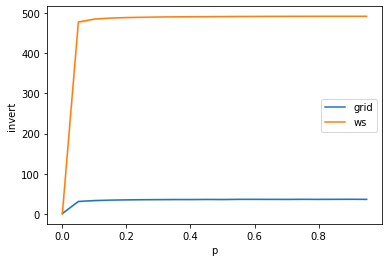

In [11]:
sns.lineplot(x = 'p', y = 'invert', data=grid_df, label ="grid")
sns.lineplot(x = 'p', y = 'invert', data=ws_df, label = "ws")

In [13]:
ws_df

,p,radius,diameter,mean,invert
0,0.00,500,500,500.0000,0.0000
1,0.00,500,500,500.0000,0.0000
2,0.00,500,500,500.0000,0.0000
3,0.05,17,26,21.1195,478.8805
4,0.05,17,27,21.5690,478.4310
5,0.05,20,31,25.3440,474.6560
6,0.10,13,19,15.2495,484.7505
7,0.10,13,18,15.4295,484.5705
8,0.10,13,19,15.2595,484.7405
9,0.15,10,15,12.6500,487.3500
